In [8]:
from journal import Journal
import matplotlib as mpl

In [9]:
mpl.style.use('seaborn')

In [2]:
journal = Journal()

In [3]:
trades = journal.get_trades()
trades

,strategy,quantity,expiration,strikes,entry_time,exit_time,entry_price,exit_price,entry_ivr,exit_ivr,entry_premium,exit_premium,margin,second_expiration,option_types,quantities,entry_notes,exit_notes
trade_id,,,,,,,,,,,,,,,,,,
1,IRON CONDOR,-1,2021-09-17,"[50, 60.0]",2021-08-15 16:39:42,2021-08-15 16:39:42,55.0,57.0,25.8,21.0,1.88,-0.9,NaN,NaN,NaN,NaN,NaN,NaN
2,IRON CONDOR,-1,2021-09-17,"[50, 60.0]",2021-08-15 16:39:42,2021-08-15 16:39:42,55.0,57.0,25.8,21.0,1.88,-0.9,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calculated Metrics

# Time
trades['days_in_trade'] = (trades['entry_time'] -
                           trades['exit_time']).apply(lambda delta: delta.days)

# Price
trades['price_pct_change'] = (trades['exit_price'] -
                              trades['entry_price']) / trades['entry_price']

# Volatility
trades['ivr_pct_change'] = (trades['exit_ivr'] -
                            trades['entry_ivr']) / trades['entry_ivr']

# TODO: Number of adjustments

# Profitability
multiplier = 100  # If trading futures options, this would change
trades['net_premium'] = trades['entry_premium'] + trades[
    'exit_premium']  # + adjustments premium
trades['pal'] = trades['net_premium'] * trades['quantity'].abs() * multiplier
trades['return_on_capital'] = trades['pal'] / trades['margin']

In [5]:
trades

,strategy,quantity,expiration,strikes,entry_time,exit_time,entry_price,exit_price,entry_ivr,exit_ivr,...,option_types,quantities,entry_notes,exit_notes,days_in_trade,price_pct_change,ivr_pct_change,net_premium,pal,return_on_capital
trade_id,,,,,,,,,,,,,,,,,,,,,
1,IRON CONDOR,-1,2021-09-17,"[50, 60.0]",2021-08-15 16:39:42,2021-08-15 16:39:42,55.0,57.0,25.8,21.0,...,NaN,NaN,NaN,NaN,0,0.036364,-0.186047,0.98,98.0,NaN
2,IRON CONDOR,-1,2021-09-17,"[50, 60.0]",2021-08-15 16:39:42,2021-08-15 16:39:42,55.0,57.0,25.8,21.0,...,NaN,NaN,NaN,NaN,0,0.036364,-0.186047,0.98,98.0,NaN


array([[<AxesSubplot:title={'center':'net_premium'}>,
        <AxesSubplot:title={'center':'days_in_trade'}>],
       [<AxesSubplot:title={'center':'price_pct_change'}>,
        <AxesSubplot:title={'center':'ivr_pct_change'}>]], dtype=object)

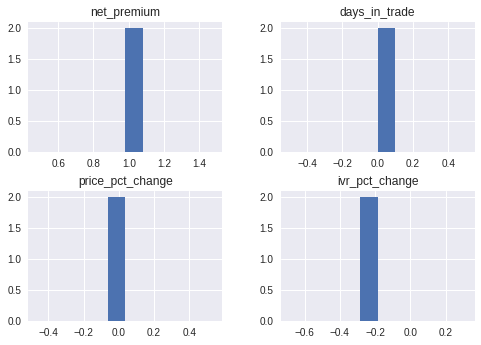

In [11]:
tracking = [
    'net_premium',
    'days_in_trade',
    'price_pct_change',
    'ivr_pct_change'
]

trades[tracking].hist()